In [596]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [597]:
## IMPORTANT NOTE: 
## To view graphs, the CSV data file must be downloaded by copy/pasting this url into your browser's address bar

url = 'https://samhda.s3-us-gov-west-1.amazonaws.com/s3fs-public/field-uploads-protected/studies/TEDS-D-2014/TEDS-D-2014-datasets/TEDS-D-2014-DS0001/TEDS-D-2014-DS0001-bundles-with-study-info/TEDS-D-2014-DS0001-bndl-data-tsv.zip'

csv_file_path=input("Please type the path of the csv data file on your computer:") # hit enter if using Kate's computer

if (len(csv_file_path) < 1):
    csv_file_path = """/Users/Kate/Desktop/Python for Everybody Specialization/Course 5 - Capstone/Weeks 3, 5, 7 - Side project/TEDS-D-2014-DS0001-data-excel.csv"""

TEDSD = pd.read_csv(csv_file_path)


Please type the path of the csv data file on your computer:


In [598]:
# input the data into a SQL database
connection = sqlite3.connect("SIDEPROJECT.sqlite")  
cur = connection.cursor()  

cur.execute("DROP TABLE IF EXISTS TEDSD");
TEDSD.to_sql(name="TEDSD", con=connection) 

In [599]:
# delete the TEDSD dataframe now that we have the data stored in a sql database
del(TEDSD)

In [600]:
# create a dictionary for the numerical coding of states from SAMHDA data source
State_dict = {1:"Alabama",2:"Alaska", 4:"Arizona", 5:"Arkansas", 6:"California", 8:"Colorado", 9:"Connecticut",
             10:"Delaware", 11: "District of Columbia", 12: "Florida", 15:"Hawaii", 16:"Idaho", 17:"Illinois",
             18:"Indiana", 19:"Iowa", 21:"Kentucky", 22:"Louisiana", 23:"Maine", 24:"Maryland", 25:"Massachusetts",
             26: "Michigan", 27:"Minnesota", 28:"Mississippi", 29:"Missouri", 30:"Montana", 31:"Nebraska", 
             32:"Nevada", 33:"New Hampshire", 34:"New Jersey", 35:"New Mexico", 36:"New York", 37:"North Carolina",
             38:"North Dakota", 39:"Ohio", 40:"Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44:"Rhode Island", 
             45: "South Carolina", 46:"South Dakota", 47:"Tennessee", 48:"Texas", 49:"Utah", 50:"Vermont", 
             51:"Virginia", 53:"Washington", 54:"West Virginia", 55:"Wisconsin", 56: "Wyoming", 72:"Puerto Rico"}

In [601]:
cur.execute("SELECT REGION,STFIPS,COUNT(CASEID) from TEDSD group by REGION,STFIPS");

In [602]:
state_table_with_codes = cur.fetchall()

In [603]:
# make region-to-color code dictionary
region_color = {0:'black', 1:'blue', 2:'red', 3:'green', 4:'cyan'}

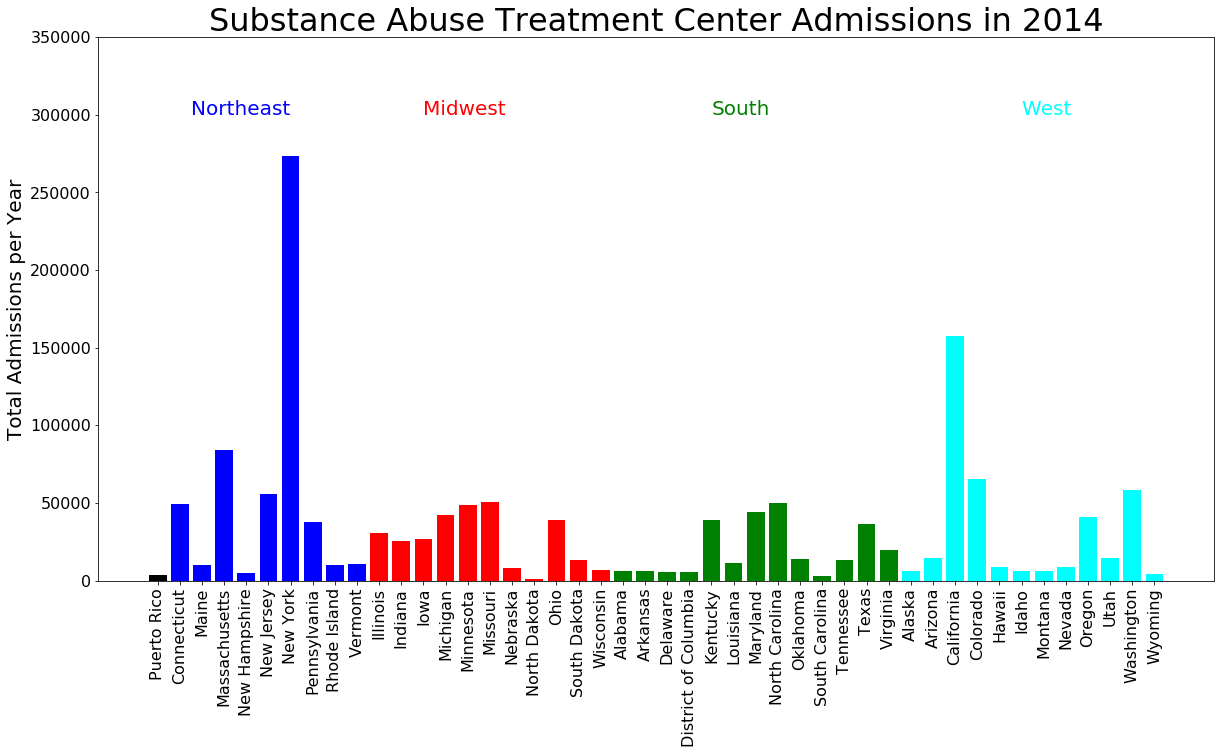

In [604]:
colors = []
states = []
episodes = []

for entry in state_table_with_codes:
    colors.append(region_color[entry[0]])
    states.append(State_dict[entry[1]])
    episodes.append(entry[2])
    
%matplotlib inline

plt.figure(figsize=(20,10))
plt.bar(states, episodes, color=colors)
plt.xticks(rotation=90, fontsize = 16);
plt.yticks(fontsize=16)
plt.title("Substance Abuse Treatment Center Admissions in 2014", fontsize = 32);
plt.ylabel("Total Admissions per Year", fontsize = 20);
plt.ylim(0,350000)
plt.text(1.5, 300000, "Northeast", color='blue',fontsize=20);
plt.text(12, 300000, "Midwest", color='red', fontsize=20);
plt.text(25, 300000, "South", color='green', fontsize=20);
plt.text(39, 300000, "West", color='cyan', fontsize=20);

There is uncertainty about...

In [605]:
# retrieve US census state populations as CSV data from my computer and create a pandas data frame
STATEPOPS = pd.read_csv("/Users/Kate/Desktop/Python for Everybody Specialization/Course 5 - Capstone/Weeks 3, 5, 7 - Side project/STATE POPULATIONS.csv")

In [608]:
cur.execute("DROP TABLE IF EXISTS STATEPOPS");
STATEPOPS.to_sql(name="STATEPOPS", con=connection) ;

In [609]:
cur.execute("SELECT STATE, POPULATION from STATEPOPS");

In [610]:
STATEPOPSdict=dict()
for (state, pop) in STATEPOPSlist:
    STATEPOPSdict[state]=pop
    


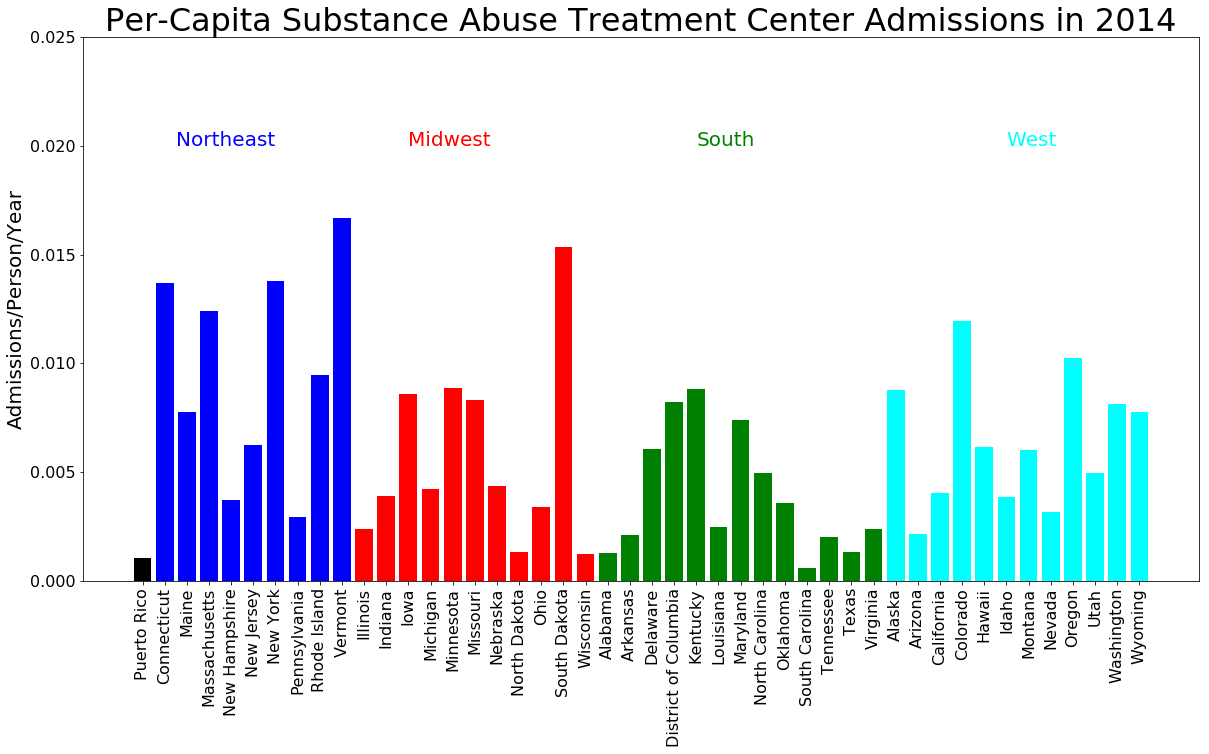

In [611]:
colors = []
states = []
per_capita_episodes = []

for entry in state_table_with_codes: 
    colors.append(region_color[entry[0]])
    states.append(State_dict[entry[1]])
    per_capita_episodes.append(entry[2]/STATEPOPSdict[State_dict[entry[1]]])
                                                      
%matplotlib inline

plt.figure(figsize=(20,10))
plt.bar(states, per_capita_episodes, color=colors)
plt.xticks(rotation=90, fontsize = 16);
plt.yticks(fontsize=16)
plt.title("Per-Capita Substance Abuse Treatment Center Admissions in 2014", fontsize = 32);
plt.ylabel("Admissions/Person/Year", fontsize = 20);
plt.ylim(0,0.025)
plt.text(1.5, 0.02, "Northeast", color='blue',fontsize=20);
plt.text(12, 0.02, "Midwest", color='red', fontsize=20);
plt.text(25, 0.02, "South", color='green', fontsize=20);
plt.text(39, 0.02, "West", color='cyan', fontsize=20);

In [612]:
# Making new plots

In [613]:
# Making Daywait CDF #removed invalid

cur.execute('SELECT DAYWAIT, COUNT(CASEID) from TEDSD group by DAYWAIT');

In [614]:
daywait_list = cur.fetchall();

In [615]:
waits = []
counts = []

for tup in daywait_list[1:len(daywait_list)]:
    waits.append(tup[0])
    counts.append(tup[1])

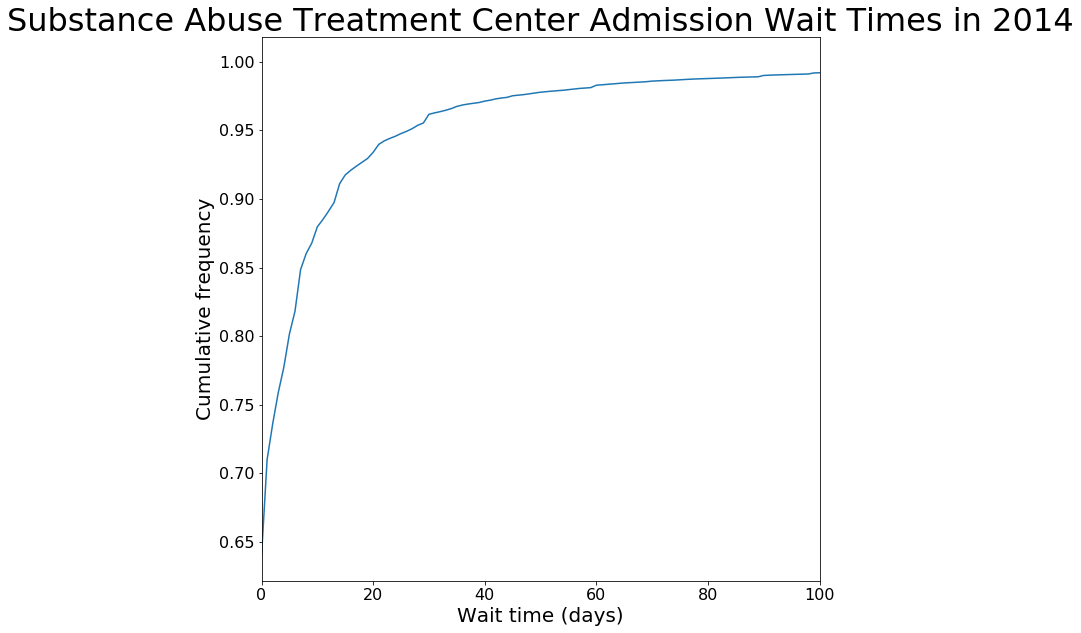

In [616]:
plt.figure(figsize=(10,10))

cdf = np.cumsum (counts)
plt.plot(waits, cdf/cdf[-1]);
plt.xlim(0,100)
plt.title("Substance Abuse Treatment Center Admission Wait Times in 2014", fontsize=32);
plt.xlabel("Wait time (days)", fontsize=20)
plt.ylabel("Cumulative frequency", fontsize=20);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

In [617]:
# Making prior episodes bar plot % removed invalid

cur.execute('SELECT NOPRIOR, COUNT(CASEID) from TEDSD group by NOPRIOR');
prior_list = cur.fetchall();

In [618]:
priors = []
counts = []

for item in prior_list[1:len(prior_list)]:
    priors.append(item[0])
    counts.append(item[1])

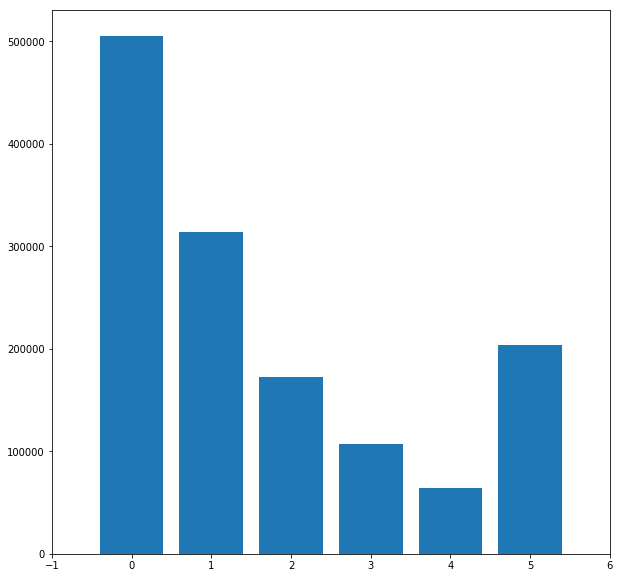

In [619]:
plt.figure(figsize=(10,10))
plt.bar(priors, counts);
plt.xlim(-1,6);

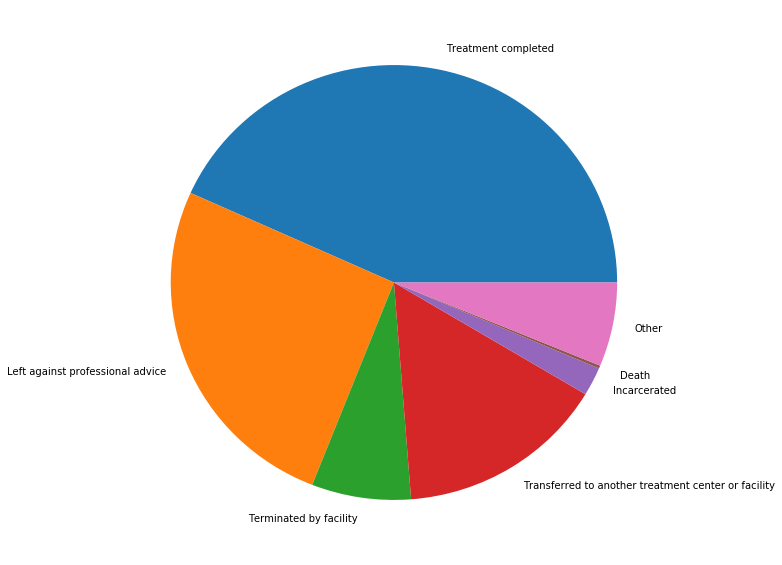

In [620]:
cur.execute('SELECT REASON, COUNT(CASEID) from TEDSD group by REASON');
reason_list = cur.fetchall();

counts = []

for item in reason_list:
    counts.append(item[1])

reason_name_list = ["Treatment completed",
                    "Left against professional advice",
                    "Terminated by facility",
                    "Transferred to another treatment center or facility",
                    "Incarcerated",
                    "Death",
                    "Other"]


plt.figure(figsize=(10,10))
plt.pie(counts, labels=reason_name_list);

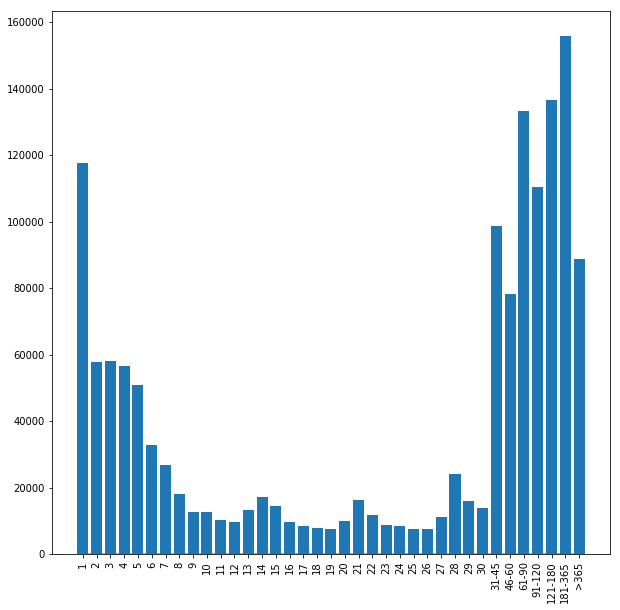

In [621]:
# make a graph of length of stay
cur.execute('SELECT LOS, COUNT(CASEID) from TEDSD group by LOS');
los_list = cur.fetchall();

lengths = []
counts = []
sum_counts = 0

for item in los_list[1:len(los_list)]:
    lengths.append(str(item[0]))
    counts.append(item[1])
    sum_counts += int(item[1])

# replace last length labels with ranges
last_bins = ['31-45', '46-60', '61-90', '91-120', '121-180', '181-365', '>365']

lengths[30:len(lengths)] = last_bins
  
norm_counts = []    
for count in counts:
    norm_counts.append(count/sum_counts)
plt.figure(figsize=(10,10))
plt.bar(lengths, counts)


cdf = np.cumsum (counts)
plt.plot (lengths, cdf/cdf[-1]);   
plt.xticks(rotation=90);

In [622]:
# make a stacked bar graph with the reasons for leaving

df = pd.read_sql("""SELECT LOS, 
                 sum((REASON=1)*1) AS "Treatment completed", 
                 sum((REASON=2)*1) AS "Left against professional advice", 
                 sum((REASON=3)*1) AS "Terminated by facility",
                 sum((REASON=4)*1) AS "Transferred to another treatment center or facility",
                 sum((REASON=5)*1) AS "Incarcerated",
                 sum((REASON=6)*1) AS "Death",
                 sum((REASON=7)*1) AS "Other"

                from TEDSD group by LOS""", con=connection)

In [623]:
df = df.drop([0], axis=0)
df = df.drop('LOS', axis=1)

In [624]:
df = df.rename(index=dict(zip(np.arange(1,len(lengths)+1),lengths)))

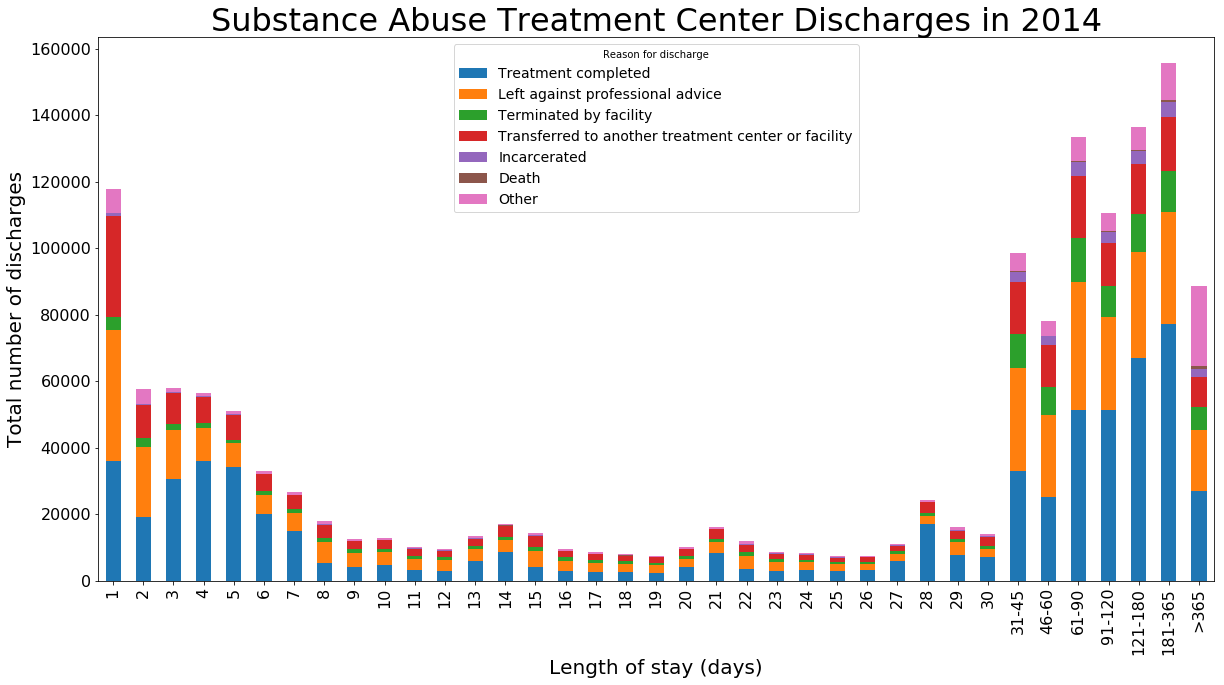

In [625]:
df.plot.bar(stacked="True", figsize=(20,10));
plt.xticks(fontsize=16);
plt.yticks(fontsize=16)
plt.title("Substance Abuse Treatment Center Discharges in 2014", fontsize=32);
plt.ylabel("Total number of discharges", fontsize=20);
plt.xlabel("Length of stay (days)", fontsize=20)
plt.legend(title="Reason for discharge", fontsize=14);